In [1]:
import sys
sys.path.append("/Users/hhg/Research/kinematic_lensing/repo/kl_measurement/scripts/")

from mcmc_two_step import return_estimates, get_fit_pars, get_data
from generate_TFcube import get_TFcube_pars
from chainconsumer import ChainConsumer
import matplotlib.pyplot as plt
import generate_TFcube as gen_TFcube
import chisq as chisq
import numpy as np

dir_tfCube: /Users/hhg/Research/kinematic_lensing/repo/KLens


In [2]:
par_names = ['vcirc', 'vscale', 'sini', 'I0', 'bkg_level']
update_TF, _ = get_TFcube_pars()
update_TF['g1'] = 0.05

update_TF['area'] = 3.14*(1000./2.)**2
update_TF['throughput'] = 0.29
# update_TF['slitWidth'] = 1.
update_TF['psfFWHM'] = 0.5
update_TF['pixScale'] = 0.1185

update_TF['redshift'] = 0.5
update_TF['Resolution'] = 6000.
update_TF['nm_per_pixel'] = 0.033
update_TF['expTime'] = 3600.
update_TF['linelist']['flux'][update_TF['linelist']['species'] == 'OIIb'] = 0.
update_TF['lambda_min'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'OIIa'] - 2
update_TF['lambda_max'] = (1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'OIIa'] + 2

TF_pars, meta_parameters = get_TFcube_pars(update_TF)

In [3]:
TF_pars

{'g1': 0.05,
 'g2': 0.0,
 'sini': 0.5,
 'diskFrac': 1.0,
 'n_knots': 25,
 'knot_fraction': 0.0,
 'aspect': 0.2,
 'vcirc': 200.0,
 'sigma_intr': 0.01,
 'redshift': 0.5,
 'half_light_radius': 0.5,
 'vscale': 0.5,
 'r_0': 0.0,
 'V_0': 0.0,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 0.e+00),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 6e-24,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psfFWHM': 0.5,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.1185,
 'Resolution': 6000.0,
 'lambda_min': array([557.0638]),
 'lambda_max': array([561.0638]),
 'nm_per_pixel': 0.033,
 'gain': 1.0,
 'read_noise': 3.0,
 'throughput': 0.29,
 'expTime': 3600.0,
 'type_of_observation': 'slit',
 'fiber_size': 1.0,
 'fiber_offsets': [[0.0, 0.0],
  [1.0, 0.0],
  [-1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0]],
 'slitAngles':

In [4]:
data, noise, obslambda = gen_TFcube.get_data_TFcube(TF_pars, meta_parameters, return_lambda=True)

returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)


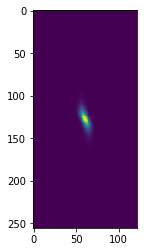

In [5]:
plt.imshow(data['spectra'][0])

In [6]:
lines = TF_pars['linelist']
for line in lines:
    print(line['lambda']*(1+TF_pars['redshift']))


559.0638
559.48125
744.0442499999999
751.236
984.6915


In [7]:
(1 + update_TF['redshift']) * update_TF['linelist']['lambda'][update_TF['linelist']['species'] == 'OIIa']

array([559.0638])

In [8]:
obslambda

array([557.0638, 557.0968, 557.1298, 557.1628, 557.1958, 557.2288,
       557.2618, 557.2948, 557.3278, 557.3608, 557.3938, 557.4268,
       557.4598, 557.4928, 557.5258, 557.5588, 557.5918, 557.6248,
       557.6578, 557.6908, 557.7238, 557.7568, 557.7898, 557.8228,
       557.8558, 557.8888, 557.9218, 557.9548, 557.9878, 558.0208,
       558.0538, 558.0868, 558.1198, 558.1528, 558.1858, 558.2188,
       558.2518, 558.2848, 558.3178, 558.3508, 558.3838, 558.4168,
       558.4498, 558.4828, 558.5158, 558.5488, 558.5818, 558.6148,
       558.6478, 558.6808, 558.7138, 558.7468, 558.7798, 558.8128,
       558.8458, 558.8788, 558.9118, 558.9448, 558.9778, 559.0108,
       559.0438, 559.0768, 559.1098, 559.1428, 559.1758, 559.2088,
       559.2418, 559.2748, 559.3078, 559.3408, 559.3738, 559.4068,
       559.4398, 559.4728, 559.5058, 559.5388, 559.5718, 559.6048,
       559.6378, 559.6708, 559.7038, 559.7368, 559.7698, 559.8028,
       559.8358, 559.8688, 559.9018, 559.9348, 559.9678, 560.0

In [9]:
chisq_parameters = chisq.get_default_parameters()
chisq_parameters['redshift'] = 0.4
chisq_parameters['central_wavelength'] = TF_pars['linelist']['lambda'][TF_pars['linelist']['species'] == 'OIIa'][0]
chisq_parameters['Resolution'] = 6000.
data, noise = get_data(TF_pars, meta_parameters)

true_pars = dict((i, TF_pars.get(i, '')) for i in par_names)

summary, chain = return_estimates(TF_pars, meta_parameters, par_names, chisq_parameters, data, noise, return_chain=True)

# second chain with different sigma_TF_intr
chisq_parameters['sigma_TF_intr'] = 100
summary_100, chain_100 = return_estimates(TF_pars, meta_parameters, par_names, chisq_parameters, data, noise, return_chain=True)

returning:
lambda, observation, model, sky (the last three are (npix, npix, nspax) datacubes)


/Users/hhg/opt/anaconda3/lib/python3.7/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


In [10]:
def get_vsini(samples):
    vsini = samples[:, par_names.index('vcirc')+1]*samples[:, par_names.index('sini')+1]
    new_samples = np.column_stack((samples[:,0], vsini))
    return new_samples


new_chain = get_vsini(chain)
new_chain_100 = get_vsini(chain_100)

In [ ]:
c = ChainConsumer().add_chain(new_chain_100, parameters=['$\gamma$', 'vsini'], color='g', name='sigma_TF=100')
c.add_chain(new_chain, parameters=['$\gamma$', 'vsini'], color='b', name='sigma_TF=0.5').configure(statistics="max", usetex=False)
fig = c.plotter.plot(truth=[TF_pars['g1'], TF_pars['vcirc']*TF_pars['sini']], extents=[(-.05, .2)])# filename='shear_constraints_400.pdf')
fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [ ]:
c = ChainConsumer().add_chain(chain, parameters=['$\gamma$', 'vcirc', 'vscale', 'sini'], color='b', name='sigma_TF=0.5')
fig = c.plotter.plot(truth=[TF_pars['g1']], extents=[(-.05, .2)])# filename='shear_constraints_400.pdf')
fig.set_size_inches(3 + fig.get_size_inches())  # Resize fig for doco. You don't need this.

In [11]:
TF_pars

{'g1': 0.05,
 'g2': 0.0,
 'sini': 0.5,
 'diskFrac': 1.0,
 'n_knots': 25,
 'knot_fraction': 0.0,
 'aspect': 0.2,
 'vcirc': 200.0,
 'sigma_intr': 0.01,
 'redshift': 0.5,
 'half_light_radius': 0.5,
 'vscale': 0.5,
 'r_0': 0.0,
 'V_0': 0.0,
 'linelist': array([('OIIa', 372.7092, 2.e-25), ('OIIb', 372.9875, 0.e+00),
        ('OIIIa', 496.0295, 2.e-25), ('OIIIb', 500.824 , 2.e-25),
        ('Halpha', 656.461 , 6.e-24)],
       dtype=[('species', '<U16'), ('lambda', '<f8'), ('flux', '<f8')]),
 'norm': 6e-24,
 'abs_magnitude': None,
 'image_size': 128,
 'ngrid': 256,
 'psfFWHM': 0.5,
 'psf_g1': 0.0,
 'psf_g2': 0.0,
 'area': 785000.0,
 'pixScale': 0.1185,
 'Resolution': 6000.0,
 'lambda_min': array([557.0638]),
 'lambda_max': array([561.0638]),
 'nm_per_pixel': 0.033,
 'gain': 1.0,
 'read_noise': 3.0,
 'throughput': 0.29,
 'expTime': 3600.0,
 'type_of_observation': 'slit',
 'fiber_size': 1.0,
 'fiber_offsets': [[0.0, 0.0],
  [1.0, 0.0],
  [-1.0, 0.0],
  [0.0, 1.0],
  [1.0, 1.0]],
 'slitAngles':

In [12]:
for key in chisq_parameters.keys():
    if key in TF_pars.keys():
        if chisq_parameters[key] != TF_pars[key]:
            print(key)

redshift
vcirc
vscale
sini
psfFWHM
g1
